<a href="https://colab.research.google.com/github/AhmedRafid023/deeplearning-with-tensorflow/blob/main/pytorchTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

In [5]:
weights = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weights * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [8]:
torch.cuda.is_available()

False

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

##we want a model to estimate the value of the weights and bias

In [10]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});



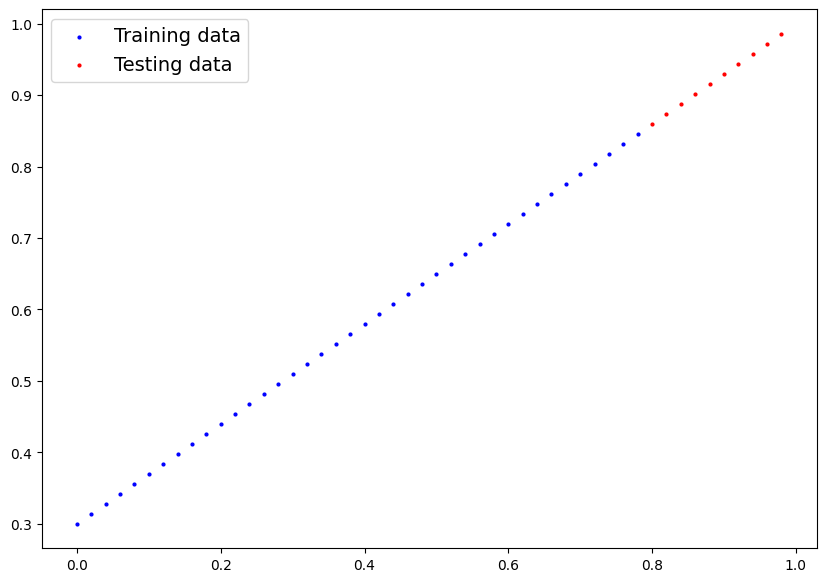

In [11]:
plot_predictions();


## First we will predict using random paremeter:

In [12]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, dtype=float), requires_grad=True)

    self.bias = nn.Parameter(torch.rand(1, dtype=float), requires_grad=True)


  # Forward defines the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [13]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.0582], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.0629], dtype=torch.float64, requires_grad=True)]

In [14]:
with torch.inference_mode():
  y_preds = model_0(X_test)

print(f"Number of test sample: {len(X_test)}")
print(f"Number of predictions: {len(y_preds)}")

Number of test sample: 10
Number of predictions: 10


In [15]:
print(f"Predicted values: \n{y_preds}")

Predicted values: 
tensor([[0.1094],
        [0.1106],
        [0.1118],
        [0.1129],
        [0.1141],
        [0.1152],
        [0.1164],
        [0.1176],
        [0.1187],
        [0.1199]], dtype=torch.float64)


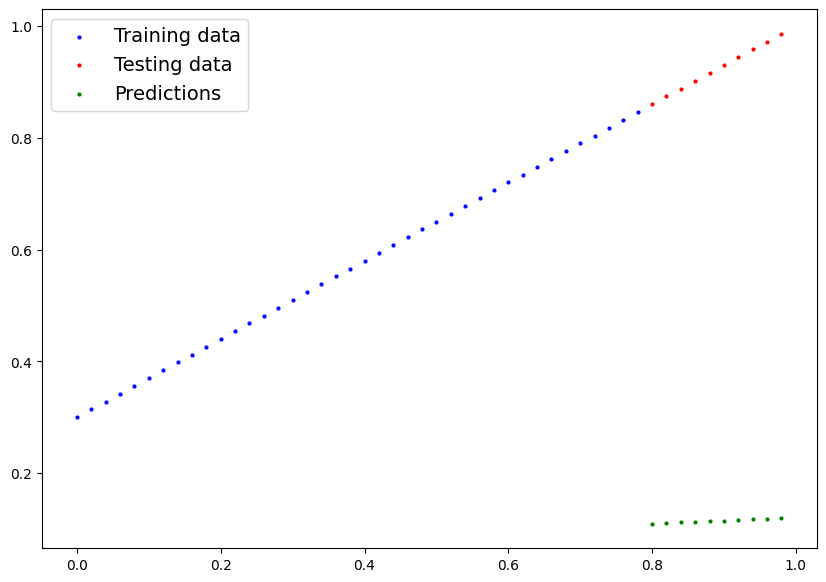

In [16]:
plot_predictions(predictions=y_preds)

##We can see that the prediction is very bad. so now we will use a loss function

In [18]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)


In [24]:
torch.manual_seed(42)

epochs = 200

train_loss_values = []
test_loss_values = []
epoch_count  = []


for epoch in range(epochs):
  model_0.train()  #put the model in training mode that makes the required_grad = true

  y_pred = model_0(X_train)

  # print(y_pred)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  # turn off gradient tracking


  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    #Print out what's happening
    if epoch % 10 == 0:
          epoch_count.append(epoch)
          train_loss_values.append(loss.detach().numpy())
          test_loss_values.append(test_loss.detach().numpy())
          print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")







Epoch: 0 | MAE Train Loss: 0.0374107024028979 | MAE Test Loss: 0.08670185294766981 
Epoch: 10 | MAE Train Loss: 0.033971902572382195 | MAE Test Loss: 0.0784294532016407 
Epoch: 20 | MAE Train Loss: 0.030539225611990573 | MAE Test Loss: 0.07084395345177898 
Epoch: 30 | MAE Train Loss: 0.027107102909130154 | MAE Test Loss: 0.06257155370574981 
Epoch: 40 | MAE Train Loss: 0.023668303078614457 | MAE Test Loss: 0.05429915395972066 
Epoch: 50 | MAE Train Loss: 0.020237296055183308 | MAE Test Loss: 0.04671365420985896 
Epoch: 60 | MAE Train Loss: 0.0168035034153624 | MAE Test Loss: 0.0384412544638298 
Epoch: 70 | MAE Train Loss: 0.013364703584846701 | MAE Test Loss: 0.03016885471780062 
Epoch: 80 | MAE Train Loss: 0.009935366498376064 | MAE Test Loss: 0.02258335496793894 
Epoch: 90 | MAE Train Loss: 0.006499903921594666 | MAE Test Loss: 0.014310955221909782 
Epoch: 100 | MAE Train Loss: 0.003061876793189468 | MAE Test Loss: 0.006725455472048081 
Epoch: 110 | MAE Train Loss: 0.0075360075982955

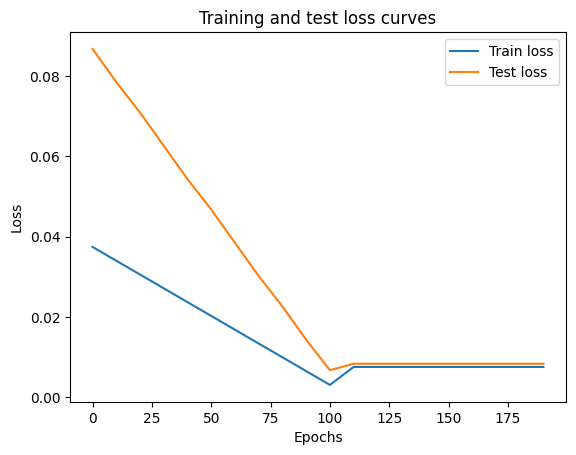

In [25]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


In [26]:
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6952], dtype=torch.float64)), ('bias', tensor([0.3094], dtype=torch.float64))])


In [27]:
with torch.inference_mode():
  y_pred = model_0(X_test)

print(y_pred)

tensor([[0.8656],
        [0.8795],
        [0.8934],
        [0.9073],
        [0.9212],
        [0.9351],
        [0.9490],
        [0.9629],
        [0.9768],
        [0.9907]], dtype=torch.float64)


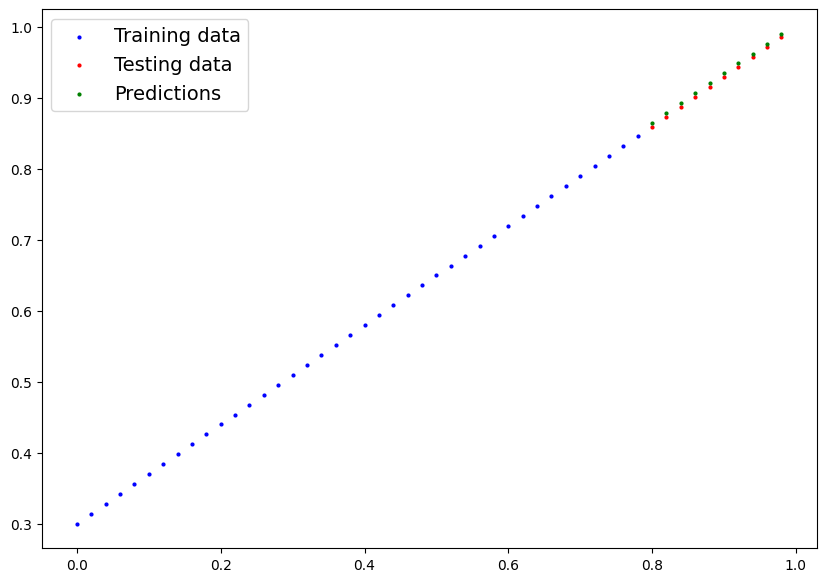

In [28]:
plot_predictions(predictions=y_pred)

In [29]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model.pth


##To check if the model works, lets load the model from the  path and check the test data

In [31]:
loaded_model_0 = LinearRegressionModel()


loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_0.to(device)

print(f"Loaded model:\n{loaded_model_0}")
print(f"Model on device:\n{next(loaded_model_0.parameters()).device}")


Loaded model:
LinearRegressionModel()
Model on device:
cpu


In [33]:
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_0_preds = loaded_model_0(X_test)

y_pred == loaded_model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])